In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from statsmodels.formula.api import ols

In [5]:
df = pd.read_csv('Telecom_X.csv')
df.sample(5)

,Churn,senior_65,partner,dependents,tenure_months,contract_type,monthly_charge,daily_charge,total_charge,internet_service,online_security,tech_support,streaming_tv,payment_method
6555,0,0,0,1,48,Month-to-month,45.55,1.52,2108.35,DSL,0,0,0,Credit card (automatic)
5939,0,0,1,0,72,Two year,106.30,3.54,7565.35,Fiber optic,0,0,1,Bank transfer (automatic)
1947,1,0,0,0,9,Month-to-month,77.65,2.59,714.15,Fiber optic,0,0,1,Bank transfer (automatic)
3944,1,1,1,0,52,Month-to-month,104.20,3.47,5568.35,Fiber optic,1,0,1,Electronic check
5610,1,0,0,0,1,Month-to-month,44.15,1.47,44.15,DSL,0,0,0,Mailed check


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   senior_65         7267 non-null   int64  
 2   partner           7267 non-null   int64  
 3   dependents        7267 non-null   int64  
 4   tenure_months     7267 non-null   int64  
 5   contract_type     7267 non-null   object 
 6   monthly_charge    7267 non-null   float64
 7   daily_charge      7267 non-null   float64
 8   total_charge      7267 non-null   float64
 9   internet_service  7267 non-null   object 
 10  online_security   7267 non-null   int64  
 11  tech_support      7267 non-null   int64  
 12  streaming_tv      7267 non-null   int64  
 13  payment_method    7267 non-null   object 
dtypes: float64(3), int64(8), object(3)
memory usage: 795.0+ KB


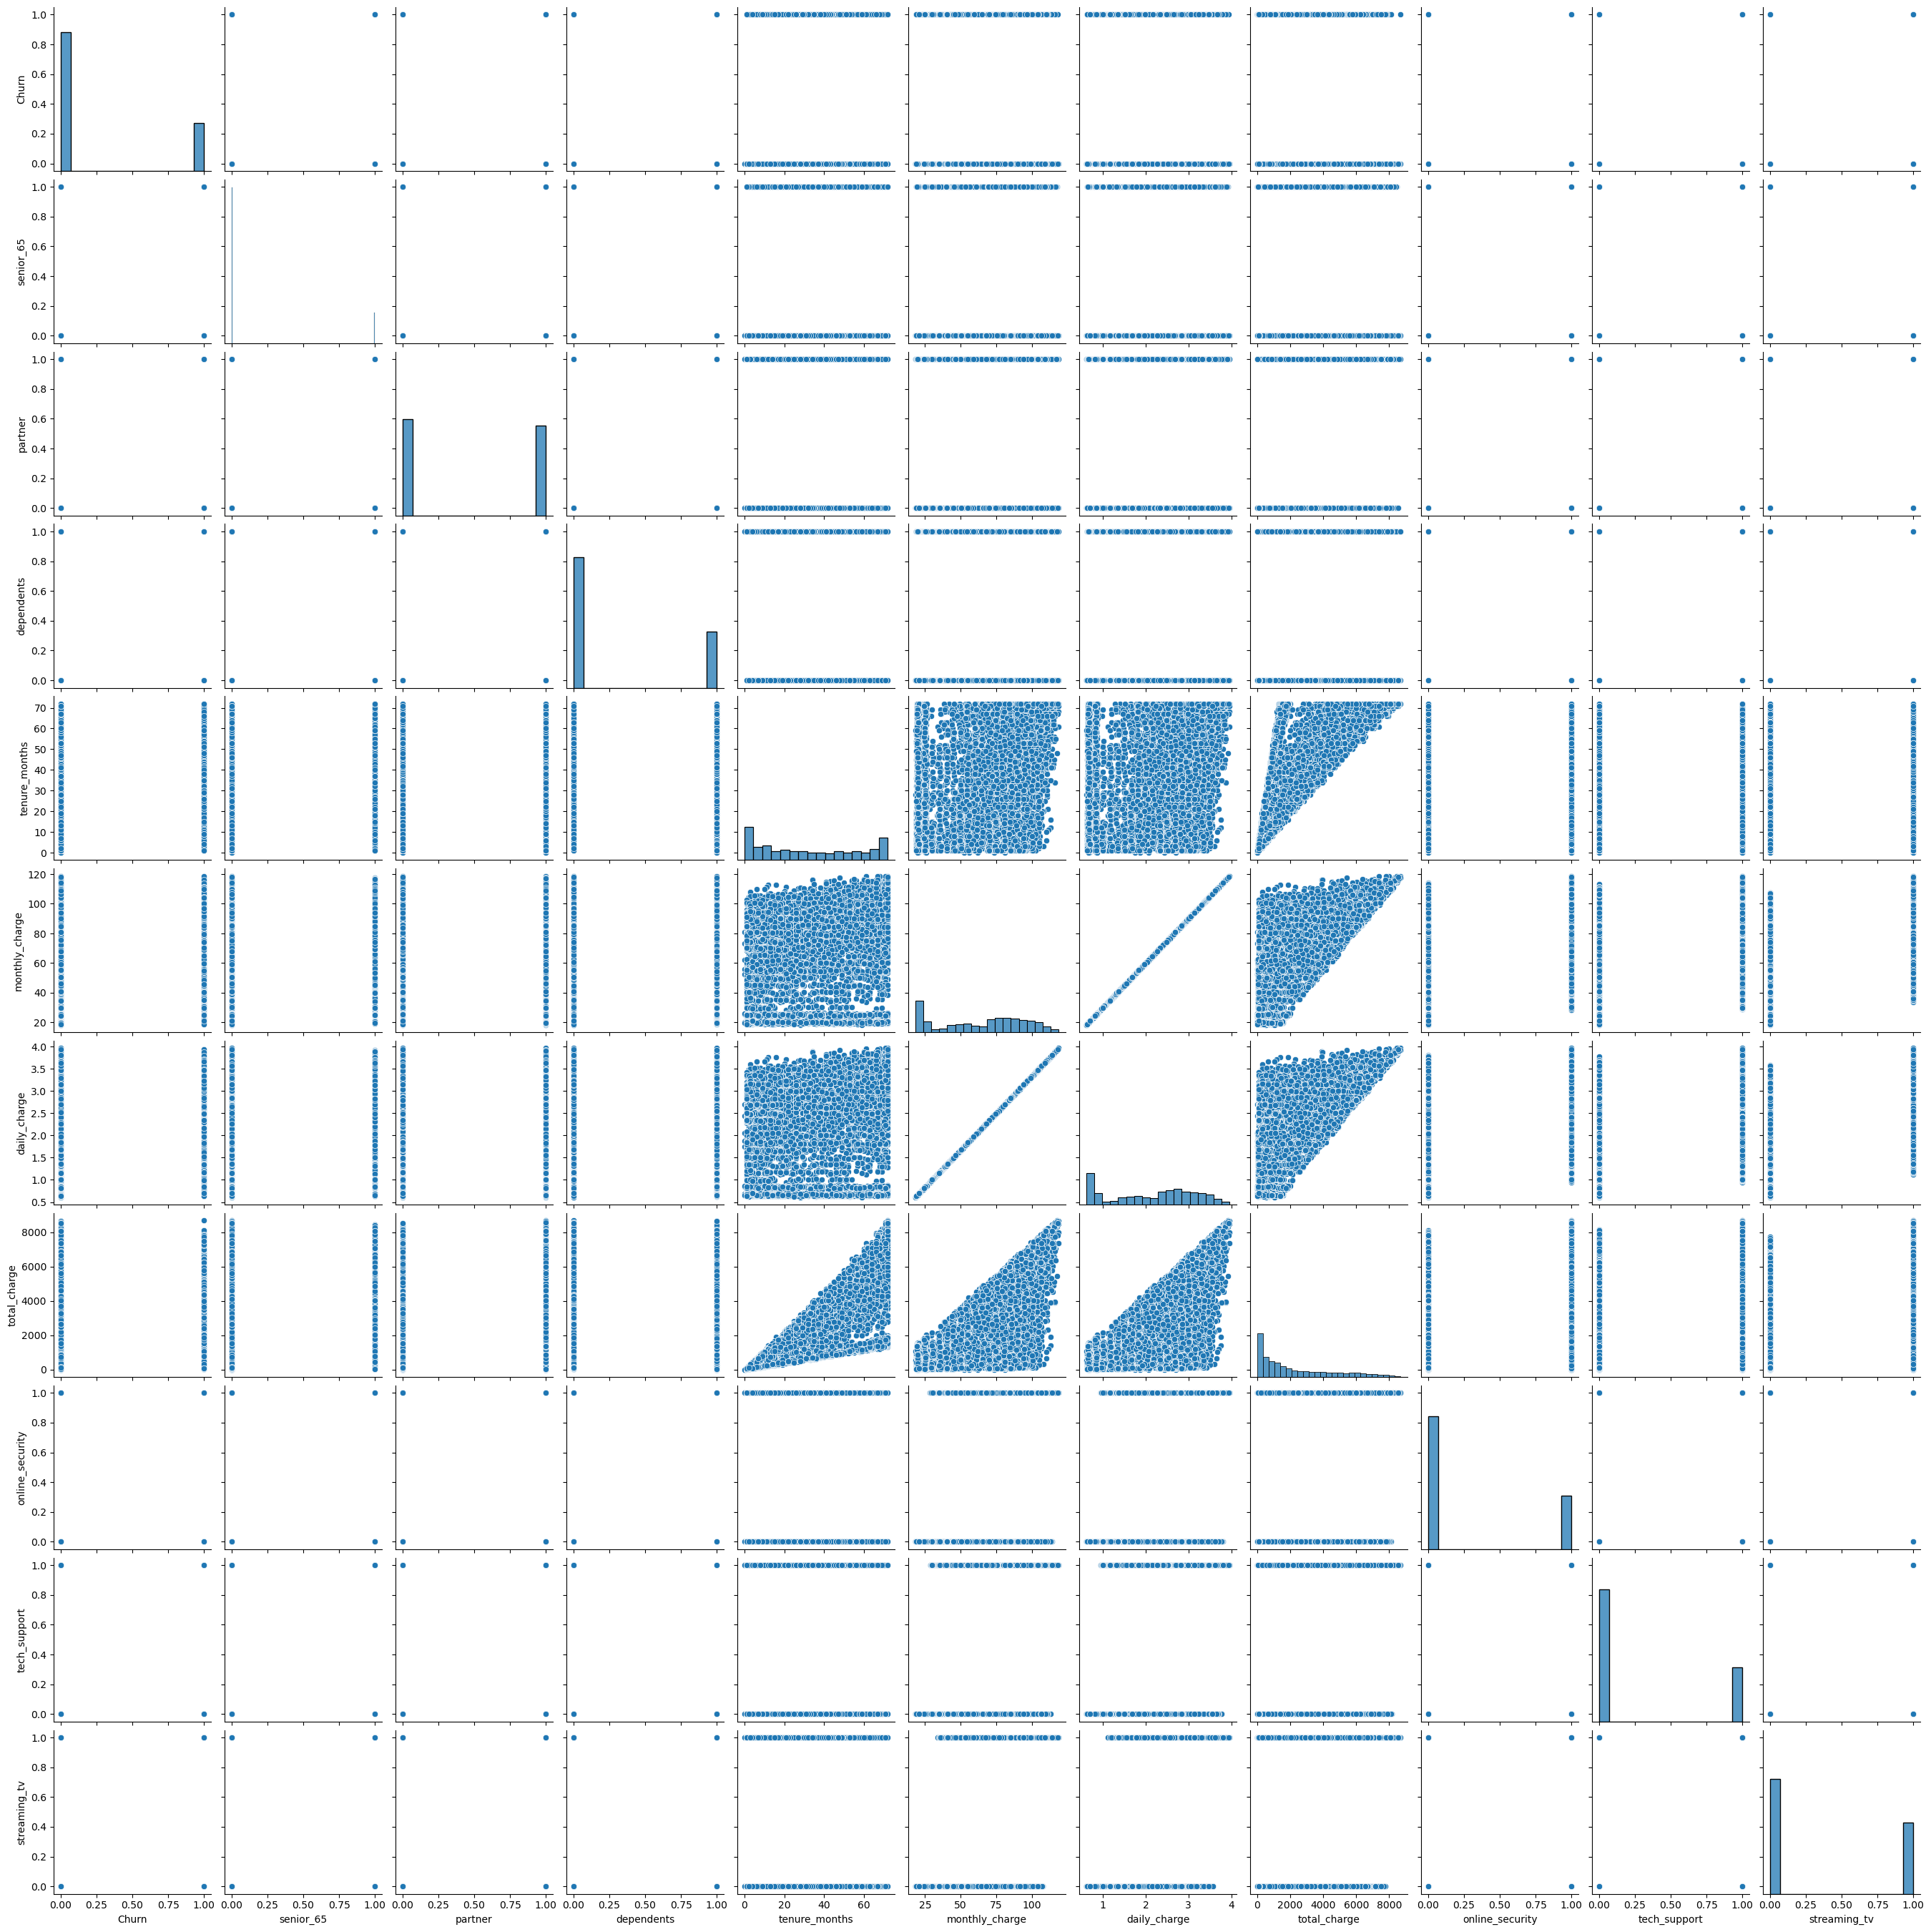

In [6]:
sns.pairplot(df)

In [9]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [10]:
X

,senior_65,partner,dependents,tenure_months,contract_type,monthly_charge,daily_charge,total_charge,internet_service,online_security,tech_support,streaming_tv,payment_method
0,0,1,1,9,One year,65.60,2.19,593.30,DSL,0,1,1,Mailed check
1,0,0,0,9,Month-to-month,59.90,2.00,542.40,DSL,0,0,0,Mailed check
2,0,0,0,4,Month-to-month,73.90,2.46,280.85,Fiber optic,0,0,0,Electronic check
3,1,1,0,13,Month-to-month,98.00,3.27,1237.85,Fiber optic,0,0,1,Electronic check
4,1,1,0,3,Month-to-month,83.90,2.80,267.40,Fiber optic,0,1,1,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,13,One year,55.15,1.84,742.90,DSL,1,1,0,Mailed check
7263,0,1,0,22,Month-to-month,85.10,2.84,1873.70,Fiber optic,0,0,0,Electronic check
7264,0,0,0,2,Month-to-month,50.30,1.68,92.75,DSL,0,0,0,Mailed check
7265,0,1,1,67,Two year,67.85,2.26,4627.65,DSL,1,1,0,Mailed check


In [25]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64

In [11]:
y

0       0
1       0
2       1
3       1
4       1
       ..
7262    0
7263    1
7264    0
7265    0
7266    0
Name: Churn, Length: 7267, dtype: int64

In [13]:
columnas = X.columns

In [14]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                   ['contract_type','internet_service','payment_method']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [15]:
X = one_hot.fit_transform(X)

/home/francisco1517/anaconda3/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:975: FutureWarning:

The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.



In [16]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__contract_type_Month-to-month',
       'onehotencoder__contract_type_One year',
       'onehotencoder__contract_type_Two year',
       'onehotencoder__internet_service_DSL',
       'onehotencoder__internet_service_Fiber optic',
       'onehotencoder__internet_service_No',
       'onehotencoder__payment_method_Bank transfer (automatic)',
       'onehotencoder__payment_method_Credit card (automatic)',
       'onehotencoder__payment_method_Electronic check',
       'onehotencoder__payment_method_Mailed check',
       'remainder__senior_65', 'remainder__partner',
       'remainder__dependents', 'remainder__tenure_months',
       'remainder__monthly_charge', 'remainder__daily_charge',
       'remainder__total_charge', 'remainder__online_security',
       'remainder__tech_support', 'remainder__streaming_tv'], dtype=object)

In [17]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__contract_type_Month-to-month,onehotencoder__contract_type_One year,onehotencoder__contract_type_Two year,onehotencoder__internet_service_DSL,onehotencoder__internet_service_Fiber optic,onehotencoder__internet_service_No,onehotencoder__payment_method_Bank transfer (automatic),onehotencoder__payment_method_Credit card (automatic),onehotencoder__payment_method_Electronic check,onehotencoder__payment_method_Mailed check,remainder__senior_65,remainder__partner,remainder__dependents,remainder__tenure_months,remainder__monthly_charge,remainder__daily_charge,remainder__total_charge,remainder__online_security,remainder__tech_support,remainder__streaming_tv
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0,65.60,2.19,593.30,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,59.90,2.00,542.40,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,73.90,2.46,280.85,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,13.0,98.00,3.27,1237.85,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,83.90,2.80,267.40,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,55.15,1.84,742.90,1.0,1.0,0.0
7263,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.0,85.10,2.84,1873.70,0.0,0.0,0.0
7264,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,50.30,1.68,92.75,0.0,0.0,0.0
7265,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,67.0,67.85,2.26,4627.65,1.0,1.0,0.0


In [19]:
label_encoder = LabelEncoder()

In [20]:
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0], shape=(7267,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 201)

In [23]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7429829389102917